<a href="https://colab.research.google.com/github/younglaecho/learn_machine_learning/blob/main/Chap04_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 로지스틱 회귀
입력되는 데이터가 어떤 클래스에 속할 지 확률로써 예측해보고자 합니다.<br>
이를 위해 우리가 예전에 사용했었던 K-최근접이웃 분류모델을 먼저 사용해보겠습니다.<br>
먼저 데이터를 준비하겠습니다.

In [1]:
import pandas as pd 
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(type(fish))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()
print(fish_target)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)


In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### K-최근접 이웃 분류 모델의 확률 예측
타겟 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류라고 부릅니다.<br>
이진 분류를 할때는 양성 클래스와 음성클래스를 1과 0으로 지정하여 타겟 데이터를 만들었지만,<Br>
다중 분류에서는 문자열로된 타깃값을 활용할 수 있습니다.


In [7]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


타겟값으로 들어온 문자열은 알파벳순으로 정렬됩니다.<br>
다행히, classes_라는 속성에 순서가 나와 있기 때문에 출력해서 확인해볼 수 있습니다.


In [8]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [9]:
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


사이킷런의 분류모델은 predict_proba()라는 메서드로 클래스별 확률값을 반환합니다.

In [10]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(kn.classes_)
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


proba에 저장된 값들은 각각의 클래스에 대한 확률입니다.

In [11]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


위의 두 결과 값을 보면 확률은 계산하는 이웃 중 해당 클래스의 개수 나누기 전체 이웃의 수 임을 알 수 있습니다.<br>
이것을 확률로 보기에는 어렵습니다.<br>
다음으로 선형회귀를 분류모델에 활용한 로지스틱 회귀를 알아보겠습니다.

## 로지스틱회귀
$$ z = a × (Weight) + b × (Length) + ... $$
에서 z는 어떤 값이든 가질 수 있습니다.<br>
하지만 확률이 되려면 0~1 의 값을 가져야만 합니다.<br>
이를 위해 시그모이드 함수를 사용하겠습니다.

#### 로지스틱 회귀에서 시그모이드를 사용하는 이유
* 0 ~ 1 사이의 값을 가진다.
* 확률을 극단적으로 예측하지 않는다.(0이나 1이 결과로 나오지 않음.)
* 연속적이다.(조금의 변화로 인해 갑자기 값이 불연속적으로 바뀌지 않음.)

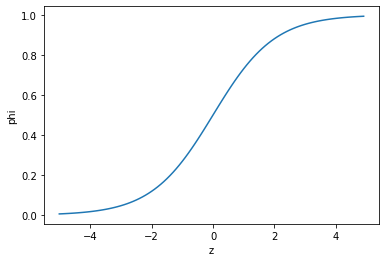

In [12]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1/ (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

로지스틱회귀 모델로 이진 분류를 할 때에는, 시그모이드 함수의 결과값이 0.5보다 크면 양성 클래스, 0.5 이하이면 음성 클래스로 판단합니다.<br>
먼저 로지스틱회귀 모델로 이진분류를 실습해보겠습니다.

In [13]:
bream_smelt_indexes = (train_target=='Bream')|(train_target=='Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
target_bream_smelt = np.where(target_bream_smelt=="Bream", 'bBream', target_bream_smelt)
target_bream_smelt = np.where(target_bream_smelt=="Smelt", 'aSmelt', target_bream_smelt)
# print(train_bream_smelt.shape, target_bream_smelt.shape)

불리언 인덱싱을 통해, bream과, smelt의 데이터만 골라내었습니다.

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# print(lr.predict(train_bream_smelt))
# print(target_bream_smelt)

print(np.column_stack((lr.predict(train_bream_smelt), target_bream_smelt))[:5])

print(lr.predict_proba(train_bream_smelt[:5]))

[['bBream' 'bBream']
 ['aSmelt' 'aSmelt']
 ['bBream' 'bBream']
 ['bBream' 'bBream']
 ['bBream' 'bBream']]
[[0.00240145 0.99759855]
 [0.97264817 0.02735183]
 [0.00513928 0.99486072]
 [0.01415798 0.98584202]
 [0.00232731 0.99767269]]


In [15]:
print(lr.classes_)
print(lr.coef_, lr.intercept_)

['aSmelt' 'bBream']
[[0.4037798  0.57620209 0.66280298 1.01290277 0.73168947]] [2.16155132]


decision_function() 메서드를 사용하면, 시그모이드 함수에 들어가기 전인 z값을 알 수있다.

In [16]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[ 6.02927744 -3.57123907  5.26568906  4.24321775  6.0607117 ]


### 로지스틱회귀 다중분류
7개의 생선을 분류해보면서 이진 분류와의 차이점을 알아보겠습니다.

max_iter로 반복횟수를 지정할 수 있다. 기본값은 100이다.<br>
C 매개변수는 규제를 표현하는 매개변수입니다. LogisticRegression에서는 릿지 회귀와 마찬가지로 계수의 제곱을 규제하는 방식입니다.<br>
C의 기본값을 1 입니다. 릿지회귀의 alpha는 커질수록 규제가 강해지지만 C는 작을수록 규제가 강해집니다.<br> 여기서는 규제를 약화하기 위해 20으로 지정하겠습니다.

In [17]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [18]:
print(np.column_stack((lr.predict(train_scaled), train_target))[:5])

[['Bream' 'Bream']
 ['Pike' 'Pike']
 ['Smelt' 'Smelt']
 ['Perch' 'Perch']
 ['Parkki' 'Parkki']]


In [19]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [20]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [21]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


행이 7개이고, intercept가 7개 입니다.<br>
이는 각각의 클래스마다 z 값을 계산한다는 뜻입니다.<br>
그 중 가장 높은 값이 예측 클래스가 됩니다. <br>
소프트맥스 함수를 사용하면  7개의 값의 합이 1이 됩니다.<br>
이러한 특성 덕분에 소프트맥스 함수를 이를 정규화된 지수함수라고 부릅니다.

In [22]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [26]:
from scipy.special import softmax
proba =softmax(decision, axis=1)
print(np.round(proba, decimals=3))
print()
print(np.round(lr.predict_proba(test_scaled[:5]), decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
